#**Section1 Project**
##목표 : 다음 분기에 어떤 게임을 설계해야 할까

과정 : 
1. EDA(데이터 전처리)
2. 문제제기
3. 데이터셋 설명,분석 및 가설
4. 결론 도출

반드시 들어가야하는 내용 :
- **지역에 따라서 선호하는 게임 장르**가 다를까 라는 질문에 대답을 하셔야합니다.
- **연도별 게임의 트렌드가 있을까** 라는 질문에 대답을 하셔야합니다.
- **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**가 포함되어야 합니다.



# 1. EDA ( 데이터 전처리 )

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv', index_col=0)
# 데이터의 기본단위를 million으로 설정함으로 M이 붙은 데이터는 M을 제거한다.
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
def standard(i) : 
  if 'K' in i :
    return int(i.replace('K','')) / 1000
  else : 
    return i

df['NA_Sales'] = df['NA_Sales'].apply(standard)
df['EU_Sales'] = df['EU_Sales'].apply(standard)
df['JP_Sales'] = df['JP_Sales'].apply(standard)
df['Other_Sales'] = df['Other_Sales'].apply(standard)

df = df.astype({'NA_Sales':float,'EU_Sales':float,'JP_Sales':float, 'Other_Sales':float})


In [6]:
df.isnull().sum()
# Year에 none 271개 , genre에 50개 , publisher에 58개

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
# Year 피처에 있는 데이터 전처리 (Nan = 0, 전체년도가 써있지 않은 데이터에 전체년도 입력하기)
import math
df['Year'] = df['Year'].fillna('123')
df['Year'] = df['Year'].apply(int)
def digit_length(n):
    return int(math.log10(n)) + 1 if n else 0

def fillyear(x) :
  if digit_length(x) < 2 :
    return 2000 + x
  elif digit_length(x) < 3 :
    if x < 20 :
      return 2000 + x
    else :
      return 1900 + x
  else :
    return  x

df['Year'] = df['Year'].apply(fillyear)
df.loc[(df.Year == 123), 'Year'] = 0

df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000,    0, 1984, 1998, 2016, 1985,
       1999, 1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989, 1986, 2017, 1980, 2020])

In [8]:
# 장르,퍼블리셔 열의 공백 Unknown 으로 대치
df['Genre']= df['Genre'].fillna('Unknown')
df['Publisher'] = df['Publisher'].fillna('Unknown')

df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', 'Unknown'], dtype=object)

In [9]:
#중복값(같은 이름, 같은 플랫폼) 제거하기
#df_dup = df[df.duplicated(['Name','Platform'])]
df_set= df.drop_duplicates(['Name','Platform','Year'], keep='first')

#df_dup.groupby(by=['Name'],as_index=False).count() 중복값 처리 되었는지 확인하기
df_dup = df_set[df_set.duplicated(['Name','Platform'])] #중복값 확인
df_dup

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12530,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13809,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02
15706,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.07,0.04,0.66


In [10]:
df_set['Total_Sales'] = df_set[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 2. 원하는 데이터 추출하기, 분석, 시각화, 가설세우고 검정

EDA 과정을 거친 후 데이터 = df_set

16596행(이름,플랫폼, 년도가 중복되는 게임 2개 삭제), 결측치 없음 , 판매량 총합 열 생성

거친 과정
- 수치데이터 전처리
- 년도 전처리
- 중복된 행( 이름,플랫폼,년도 기준 ) 전처리
- 장르, 퍼블리셔 결측치 Unknown으로 대치

In [11]:
#지역에 따라서 선호하는 게임 장르가 다를까 
import matplotlib.pyplot as plt
#각각 지역에 장르별 판매량 모음
df_na = df_set[['Genre','NA_Sales']]
df_na.reset_index(drop=False)
df_na = df_na.groupby(by='Genre',as_index=False).sum() #as_index=False 인덱스 자동지정x

df_eu = df_set[['Genre','EU_Sales']]
df_eu.reset_index(drop=False)
df_eu = df_eu.groupby(by='Genre',as_index=False).sum()

df_jp = df_set[['Genre','JP_Sales']]
df_jp.reset_index(drop=False)
df_jp = df_jp.groupby(by='Genre',as_index=False).sum()

df_oth = df_set[['Genre','Other_Sales']]
df_oth.reset_index(drop=False)
df_oth = df_oth.groupby(by='Genre',as_index=False).sum()


In [12]:
# 지역별 장르 출고량 데이터셋
df_world = pd.merge(df_na,df_eu)
df_world1 = pd.merge(df_jp,df_oth)
df_world = pd.merge(df_world,df_world1)
df_world = df_world.set_index('Genre')
df_world

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.26,102.65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


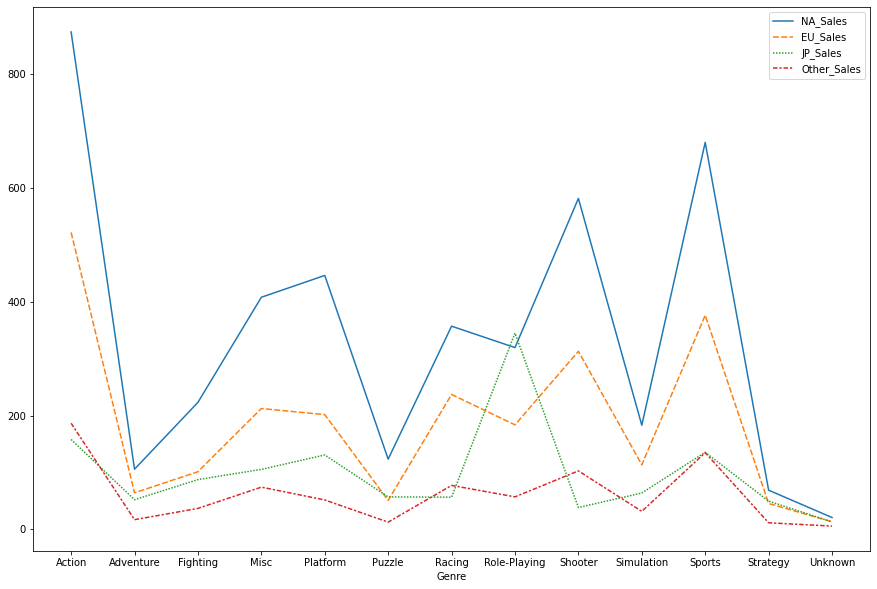

In [164]:
# 지역별 장르 출고량 시각화
sns.lineplot(data=df_world)
values = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation','Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting','Shooter', 'Unknown']
ax = plt.subplot()
ax.set_xticks(values)
plt.rcParams["figure.figsize"] = (5,10)

In [ ]:
# NA_Sales 1위 : Action, 2위: Sports, 3위 : Shooter
# EU_Sales 1위 : Action, 2위: Sports, 3위 : Shooter
# JP_Sales 1위 : Role-Playing, 2위: Action, 3위 : Sports
# Other_Sales 1위 : Action, 2위: Sports, 3위 : Shooter

In [13]:
df_na = df_na.set_index('Genre')
df_eu = df_eu.set_index('Genre')
df_jp = df_jp.set_index('Genre')
df_oth = df_oth.set_index('Genre')

In [14]:
# ANOVA를 통해 지역별 장르별 판매량의 연관성 파악해보기
from scipy import stats
from scipy.stats import f_oneway

f_oneway(df_na, df_eu, df_jp, df_oth) # pvalue=array([0.00020204])
# 귀무가설인 연관성이 있다를 기각하고 4개의 집단중 하나라도 연관성이 없을 수 있다라고 결론
#f_oneway(df_na, df_eu) # pvalue = 0.07
#f_oneway(df_jp, df_oth) # pvalue = 0.18
#f_oneway( df_oth, df_eu) # pvalue=array([0.00833305]))
#f_oneway(df_na, df_oth) # pvalue=array([0.00087896]))
#결론 : 네 지역의 장르 선호는 연관성이 없다. 그러나 북미,유럽 혹은 일본,기타 지역들은 서로 연관성이 없지는 않을 것이다 라고 보인다.

F_onewayResult(statistic=array([7.98930431]), pvalue=array([0.00020204]))

In [15]:
a =df_world['NA_Sales'].values
b = df_world['EU_Sales'].values
c = df_world['JP_Sales'].values
d = df_world['Other_Sales'].values
res1 = np.corrcoef(a,b)
res2 = np.corrcoef(b,d)
res3 = np.corrcoef(a,c)
res4 = np.corrcoef(c,d)
res5 = np.corrcoef(b,c)
res6 = np.corrcoef(a,d)
print(res4)
#print(res1,res2,res3,res4, res5)
# 상관계수를 통해서 각각 변수들이 연관성을 가지며 변화하는지를 알아봤으나 위의 ANOVA 테스트와 같은 결과를 얻을 수 있었다.

[[1.         0.33314773]
 [0.33314773 1.        ]]


##2) 연도별 게임 트렌드 확인하기
  - 연도별 가장 많이 팔린 타이틀 데이터셋 정리 
  - 연도별 가장 많이 출시된 장르 popular_genre
  - 연도별 가장 많이 출시된 장르의 개수 popular_count
  - 연도별 가장 많이 게임이 출시된 플랫폼 popular_platform
  - 연도별 가장 많이 게임 퍼블리싱을 한 회사 popular_publisher

# 분석내용
 1) 가장 많이 팔린 게임타이틀 분석할 시 2000년도를 기준으로 이전엔 일본 게임이 이후엔 미주 게임이 연도별 베스트셀러를 기록했다.
 
 2) 베스트 셀러의 장르는 서로 연관성이 없다. 
 
 3) 플랫폼이 인기 있을수록 베스트셀러가 나오는 경우가 많다. 

 4) 2001년 PS2가 가장 인기있는 플랫폼이 되면서 그전에 이어지던 최다 게임퍼블리셔 = 인기있는 플랫폼회사 라는 공식이 깨졌다. 

 5) 최다 퍼블리셔 시간순 아타리 - 닌텐도 - 소니 - 코나미 - EA – Activision – Namco 순이다. 

 6) 플랫폼 시간순 아타리 2600 – Nes – GB – Snes - PS - PS2 -  닌텐도 ds – ps3 – ps4 순이다. 

 7) 최다 출시 장르 시간순 Action - Fighting - Sports - Action 순이다.

In [16]:
df_set.drop(df_set.loc[df_set['Year']==0].index, inplace=True) # Year 결측치 행 제거
# 연도별 가장 많이 팔린 타이틀 데이터셋
cols = 'Name'	,'Platform'	,'Year'	,'Genre',	'Publisher'	,'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'
df_try = pd.DataFrame(columns=cols)

for i in range(1980,2018) :
  df_try = df_try.append(df_set[df['Year']==i].sort_values(by='Total_Sales',ascending=False).iloc[0])
df_try = df_try.reset_index(drop=True)
df_try


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarnin

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
4,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.50
7,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
8,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [18]:
df_trendfinal = df_try
p_genre = df_set.groupby(by=['Year','Genre'], as_index=False).count()
cols = 'Year'	,'Genre','Name'	,'Platform'	,	'Publisher'	,'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'
df_try1 = pd.DataFrame(columns=cols)

for i in range(1980,2018) :
  df_try1 = df_try1.append(p_genre[p_genre['Year']==i].sort_values(by='Name',ascending=False).iloc[0])
df_try1 = df_try1.reset_index(drop=True)
df_trendfinal['popular_genre'] = df_try1['Genre']
df_trendfinal['popular_count'] = df_try1['Name']

In [19]:
p_platform = df_set.groupby(by=['Year','Platform'], as_index=False).count()
cols = 'Year'	,'Platform','Name'	,'Genre'	,	'Publisher'	,'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'
df_try2 = pd.DataFrame(columns=cols)

for i in range(1980,2018) :
  df_try2 = df_try2.append(p_platform[p_platform['Year']==i].sort_values(by='Name',ascending=False).iloc[0])
df_try2 = df_try2.reset_index(drop=True)
df_try2

,Year,Platform,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,2600,9,9,9,9,9,9,9,9
1,1981,2600,46,46,46,46,46,46,46,46
2,1982,2600,36,36,36,36,36,36,36,36
3,1983,2600,11,11,11,11,11,11,11,11
4,1984,NES,13,13,13,13,13,13,13,13
5,1985,NES,11,11,11,11,11,11,11,11
6,1986,NES,19,19,19,19,19,19,19,19
7,1987,NES,10,10,10,10,10,10,10,10
8,1988,NES,11,11,11,11,11,11,11,11
9,1989,GB,10,10,10,10,10,10,10,10


In [20]:
p_publisher = df_set.groupby(by=['Year','Publisher'], as_index=False).count()
cols = 'Year'	,'Publisher','Name'	,'Platform','Genre'	,'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'
df_try3 = pd.DataFrame(columns=cols)

for i in range(1980,2018) :
  df_try3 = df_try3.append(p_publisher[p_publisher['Year']==i].sort_values(by='Name',ascending=False).iloc[0])
df_try3 = df_try3.reset_index(drop=True)
df_try3

,Year,Publisher,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,Activision,5,5,5,5,5,5,5,5
1,1981,Atari,11,11,11,11,11,11,11,11
2,1982,Atari,14,14,14,14,14,14,14,14
3,1983,Atari,6,6,6,6,6,6,6,6
4,1984,Nintendo,9,9,9,9,9,9,9,9
5,1985,Nintendo,7,7,7,7,7,7,7,7
6,1986,Nintendo,6,6,6,6,6,6,6,6
7,1987,Atari,4,4,4,4,4,4,4,4
8,1988,Nintendo,6,6,6,6,6,6,6,6
9,1989,Nintendo,9,9,9,9,9,9,9,9


In [21]:
# df_trendfinal 연도별 가장 많이 팔린 타이틀 과 그 판매량, 가장 인기있었던 장르, 그 장르의 개수, 인기있는 플랫폼,퍼블리셔 데이터셋구성
df_trendfinal['popular_genre'] = df_try1['Genre']
df_trendfinal['popular_count'] = df_try1['Name']
df_trendfinal['popular_platform'] = df_try2['Platform']
df_trendfinal['popular_publisher'] = df_try3['Publisher']
df_trendfinal



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,popular_genre,popular_count,popular_platform,popular_publisher
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,Misc,4,2600,Activision
1,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50,Action,25,2600,Atari
2,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,Action,18,2600,Atari
3,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20,Action,7,2600,Atari
4,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Puzzle,3,NES,Nintendo
5,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Platform,4,NES,Nintendo
6,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.50,Action,6,NES,Nintendo
7,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38,Sports,4,NES,Atari
8,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,Platform,4,NES,Nintendo
9,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Puzzle,5,GB,Nintendo


## 3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

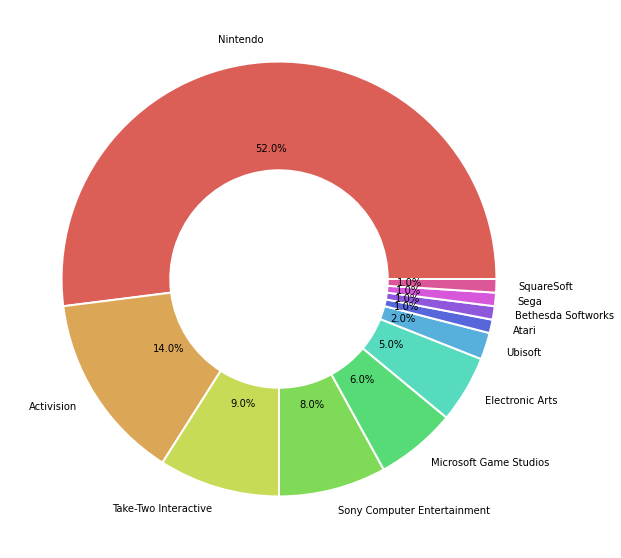

In [24]:
import seaborn as sns
df_sales = df_set.sort_values(by='Total_Sales', ascending=False).iloc[0:100]
df_pb = df_sales.groupby(by=['Publisher'], as_index=False).count().sort_values(by = ['Name'], ascending=False ) # 출고량 상위 100위에 퍼블리셔별 게임 개수

labels = 'Nintendo', 'Activision', 'Take-Two Interactive','Sony Computer Entertainment', 'Microsoft Game Studios','Electronic Arts', 'Ubisoft', 'Atari', 'Bethesda Softworks','Sega', 'SquareSoft'
colors = sns.color_palette('hls',len(labels))
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_pb['Name'], labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (10, 10)
# 출고량 상위 100위를 퍼블리셔별로 시각화

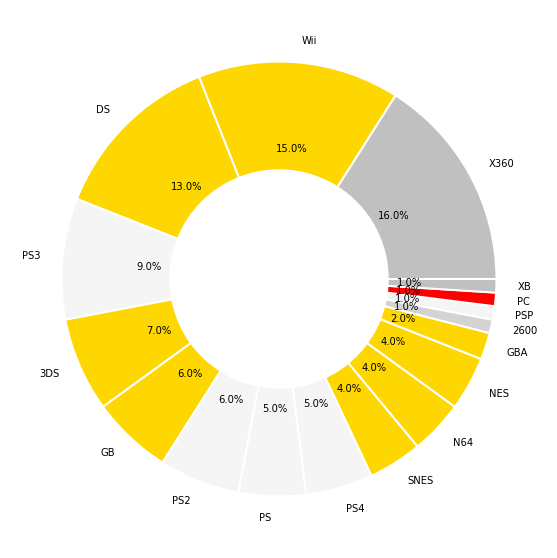

In [25]:
df_pl=df_sales.groupby(by=['Platform'], as_index=False).count().sort_values(by = ['Name'], ascending=False ) # 플랫폼별 출고량 상위 100위 정렬
df_pl
# wii,ds,3ds,gb,snes,n64,nes,gba는 닌텐도의 게임기
labels = 'X360', 'Wii', 'DS', 'PS3', '3DS', 'GB', 'PS2', 'PS', 'PS4','SNES', 'N64', 'NES', 'GBA', '2600', 'PSP', 'PC', 'XB'
colors = 'silver', 'gold', 'gold', 'whitesmoke', 'gold', 'gold', 'whitesmoke','whitesmoke', 'whitesmoke', 'gold', 'gold', 'gold', 'gold', 'lightgray','whitesmoke','red','silver'
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_pl['Name'], labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (15, 15)
#닌텐도 플랫폼이 절반이상을 차지하고 있다. / 색상별로 같은 회사 기종

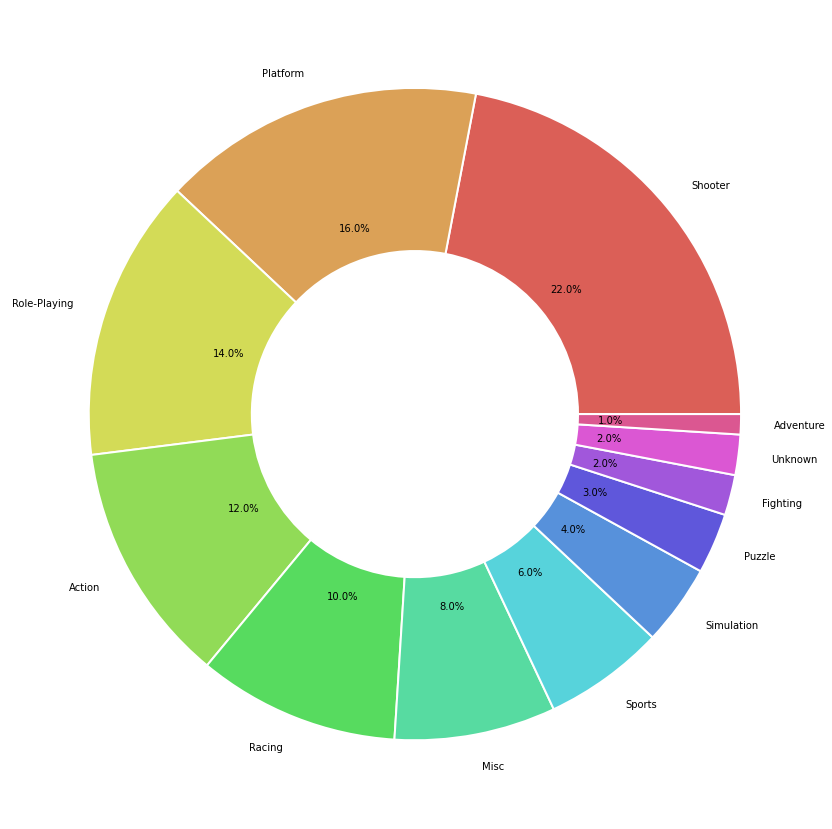

In [26]:
df_gr = df_sales.groupby(by=['Genre'], as_index=False).count().sort_values(by = ['Name'], ascending=False )
df_gr['Genre'].unique()
labels = 'Shooter', 'Platform', 'Role-Playing', 'Action', 'Racing', 'Misc','Sports', 'Simulation', 'Puzzle', 'Fighting', 'Unknown','Adventure'
colors = sns.color_palette('hls',len(labels))
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_gr['Name'], labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (5, 5)

In [29]:
df_sales2[0:50]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
3054,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
3055,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
1,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
1259,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
3056,Pokemon X/Pokemon Y,3DS,2013,Unknown,Nintendo,5.17,4.05,4.34,0.79,14.35
4182,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2398,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
2399,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [30]:
#액션 장르에서 top 10위 중 GTA5가 차지하는 비율 확인
#df_sales2[df_sales2['Genre']=='Role-Playing'][0:30]
df_sales2[df_sales2['Genre']=='Action'][0:10]
#print((21.39 + 16.38 +11.99) / 95.76)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3054,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
3055,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3600,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2404,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
1267,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82
10,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
2406,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
12,Red Dead Redemption,X360,2010,Action,Take-Two Interactive,3.70,1.97,0.09,0.57,6.33
3061,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.98
1271,Batman: Arkham City,PS3,2011,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,5.52


In [53]:
# 2010년 이후 최근 게임의 트렌드를 좀더 반영하고자 데이터셋을 구성
df_sales2 = pd.DataFrame()
for i in range(2010,2018) :
  df_sales2 = df_sales2.append(df_set[df_set['Year']==i].sort_values(by='Total_Sales',ascending=False))
df_sales2 = df_sales2.reset_index(drop=True)
df_sales2 = df_sales2.sort_values(by='Total_Sales',ascending=False)
df_sales2[df_sales2['Genre'] == 'Role-Playing'][0:30] #2위
#df_sales2[df_sales2['Genre'] == 'Action'][0:30] #최근 10년간 출고량 1위
#df_sales2[df_sales2['Genre'] == 'Shooter'][0:30] #3위
#df_sales = df_set.sort_values(by='Year','Total_Sales').iloc[0:100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
3601,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
1264,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
2403,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34
4186,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
1269,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56
2409,Diablo III,PC,2012,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20
14,Fable III,X360,2010,Role-Playing,Microsoft Game Studios,3.59,1.11,0.05,0.38,5.13
16,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
4190,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09


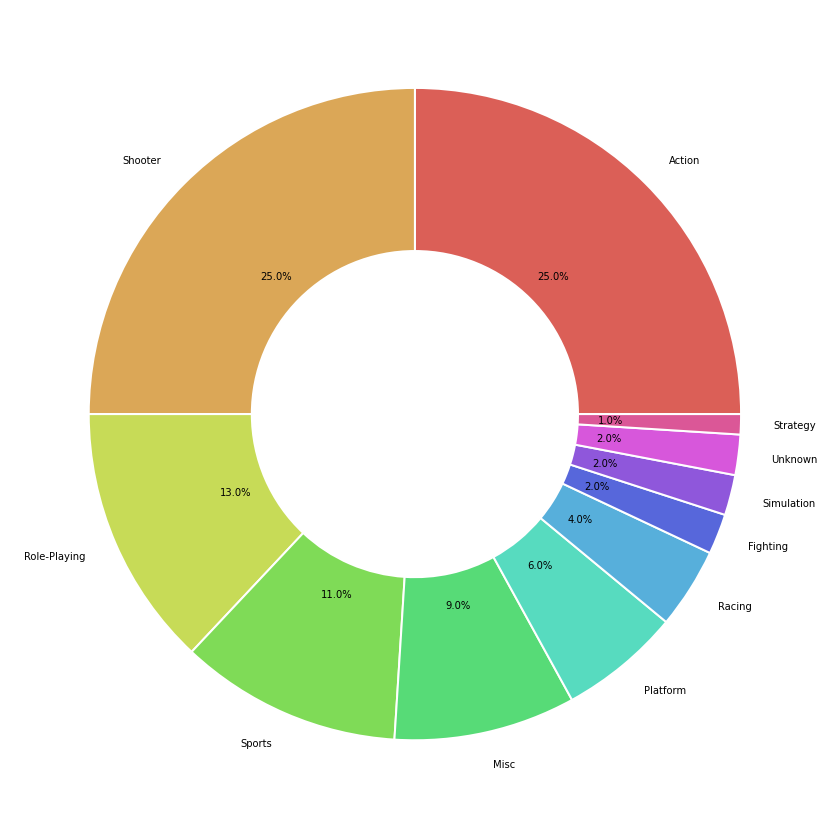

In [55]:
df_sales2 = df_sales2[0:100]
df_gr1 = df_sales2.groupby(by=['Genre'], as_index=False).count().sort_values(by = ['Name'], ascending=False )

labels = 'Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Platform','Racing', 'Fighting', 'Simulation', 'Unknown', 'Strategy'
colors = sns.color_palette('hls',len(labels))
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_gr1['Name'], labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (5,5)
# 2010년이후부터의 출고량 상위 100개 장르별 분포


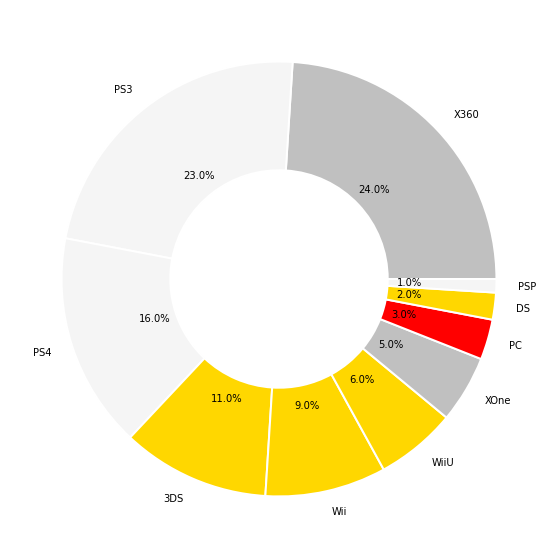

In [59]:
df_pl1=df_sales2.groupby(by=['Platform'], as_index=False).count().sort_values(by = ['Name'], ascending=False ) # 플랫폼별 출고량 상위 100위 정렬
# wii,ds,3ds,gb,snes,n64,nes,gba는 닌텐도의 게임기
labels = 'X360','PS3', 'PS4','3DS', 'Wii', 'WiiU', 'XOne', 'PC', 'DS','PSP'
colors = 'silver', 'whitesmoke', 'whitesmoke', 'gold', 'gold', 'gold', 'silver','red', 'gold', 'whitesmoke'
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_pl1['Name'], labels = labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (15, 15)
# 최근 10년 상위 출고량 100위에 대한 플랫폼 추이 닌텐도에서 PS로 많이 변화됨.

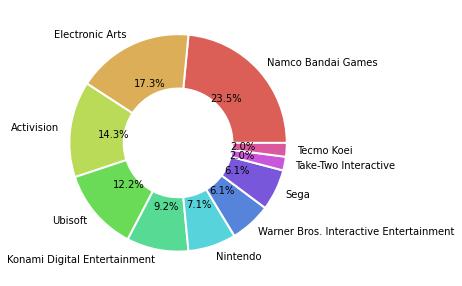

In [50]:
df_pb1=df_sales2.groupby(by=['Publisher'], as_index=False).count().sort_values(by = ['Name'], ascending=False )[0:10] # 퍼블리셔별 출고량 상위 100위 정렬

labels = 'Namco Bandai Games', 'Electronic Arts', 'Activision', 'Ubisoft','Konami Digital Entertainment', 'Nintendo','Warner Bros. Interactive Entertainment', 'Sega','Take-Two Interactive', 'Tecmo Koei'
colors = sns.color_palette('hls',len(labels))
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df_pb1['Name'],labels=labels , autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (15, 15)
# 2010년 이후 퍼블리셔 상위 10개 순위 및 퍼센트


In [54]:
#최적의 퍼블리셔 찾기 - 롤플레잉이 많은 퍼블리셔와 기종이 PS를 많이 지원하는 퍼블리셔 선정 기준

df_sales2[df_sales2['Publisher']== 'Namco Bandai Games'][0:30]
#df_sales2[df_sales2['Publisher']== 'Electronic Arts'][0:30] #스포츠, 슈팅위주
#df_sales2[df_sales2['Publisher']== 'Activision'][0:30] #슈터 위주
#df_sales2[df_sales2['Publisher']== 'Ubisoft'][0:30] #액션 위주
#df_sales2[df_sales2['Publisher']== 'Konami Digital Entertainment'][0:30] # 액션 위주

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4193,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,0.56,3.73
1307,Dark Souls,PS3,2011,Role-Playing,Namco Bandai Games,0.75,0.54,0.54,0.23,2.06
1318,Go Vacation,Wii,2011,Misc,Namco Bandai Games,0.48,0.68,0.33,0.16,1.65
4803,Dark Souls III,PS4,2016,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
1324,Ni no Kuni: Wrath of the White Witch,PS3,2011,Role-Playing,Namco Bandai Games,0.60,0.51,0.21,0.23,1.55
3663,Dark Souls II,PS3,2014,Role-Playing,Namco Bandai Games,0.40,0.36,0.40,0.17,1.33
4232,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,Namco Bandai Games,0.66,0.47,0.00,0.11,1.24
1344,Tales of Xillia,PS3,2011,Role-Playing,Namco Bandai Games,0.29,0.19,0.67,0.09,1.24
101,Naruto Shippuden: Ultimate Ninja Storm 2,PS3,2010,Fighting,Namco Bandai Games,0.42,0.47,0.15,0.18,1.22
2461,One Piece: Pirate Warriors,PS3,2012,Action,Namco Bandai Games,0.01,0.24,0.86,0.09,1.20


In [57]:
# 2010년 이후 장르별 출고량 데이터셋
df_na1 = df_sales2[['Genre','NA_Sales']]
df_na1.reset_index(drop=False)
df_na1= df_na1.groupby(by='Genre',as_index=False).sum() #as_index=False 인덱스 자동지정x

df_eu1 = df_sales2[['Genre','EU_Sales']]
df_eu1.reset_index(drop=False)
df_eu1 = df_eu1.groupby(by='Genre',as_index=False).sum()

df_jp1 = df_sales2[['Genre','JP_Sales']]
df_jp1.reset_index(drop=False)
df_jp1 = df_jp1.groupby(by='Genre',as_index=False).sum()

df_oth1 = df_sales2[['Genre','Other_Sales']]
df_oth1.reset_index(drop=False)
df_oth1 = df_oth1.groupby(by='Genre',as_index=False).sum()

df_world = pd.merge(df_na1,df_eu1)
df_world1 = pd.merge(df_jp1,df_oth1)
df_world = pd.merge(df_world,df_world1)
df_world = df_world.set_index('Genre')
df_world

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,68.37,65.88,5.44,23.54
Fighting,5.83,2.41,3.22,1.00
Misc,45.15,22.86,0.86,7.16
Platform,19.89,12.73,8.60,3.13
Racing,12.91,12.90,4.81,3.97
Role-Playing,35.70,25.39,20.05,7.35
Shooter,111.91,73.56,5.78,25.75
Simulation,2.97,4.34,6.25,0.69
Sports,14.15,39.31,0.51,10.94


In [ ]:
# 전 연도 지역별 장르순위
# NA_Sales 1위 : Action, 2위: Sports, 3위 : Shooter
# EU_Sales 1위 : Action, 2위: Sports, 3위 : Shooter
# JP_Sales 1위 : Role-Playing, 2위: Action, 3위 : Sports
# Other_Sales 1위 : Action, 2위: Sports, 3위 : Shooter

# 2010년이후 지역별 장르순위
# NA_Sales 1위 : Action, 2위: Shooter, 3위 : Sports
# EU_Sales 1위 : Action, 2위: Shooter, 3위 : Sports
# JP_Sales 1위 : Role-Playing, 2위: Action, 3위 : Misc
# Other_Sales 1위 : Action, 2위: Shooter, 3위 : Sports